In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
fish_market_dataset_url = 'https://raw.githubusercontent.com/Ankit152/Fish-Market/main/Fish.csv'
fish_market_df = pd.read_csv(fish_market_dataset_url)
fish_market_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


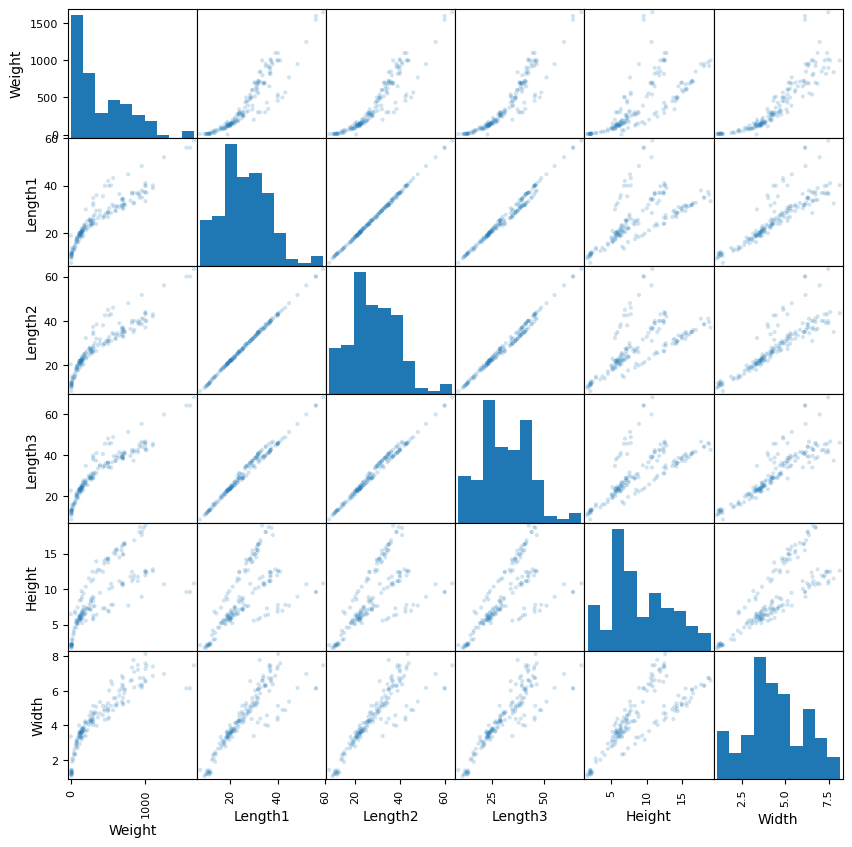

In [4]:
_ = pd.plotting.scatter_matrix(fish_market_df, alpha=0.2, figsize=(10,10))

In [5]:
classification_target = fish_market_df.pop('Species')
regression_target = fish_market_df.pop('Weight')

Model Score: 0.8438584812596858
MSE: 19883.452891036774
Intercept: -473.6490074068006
Coef: 30.686370858918856 [30.68637086]


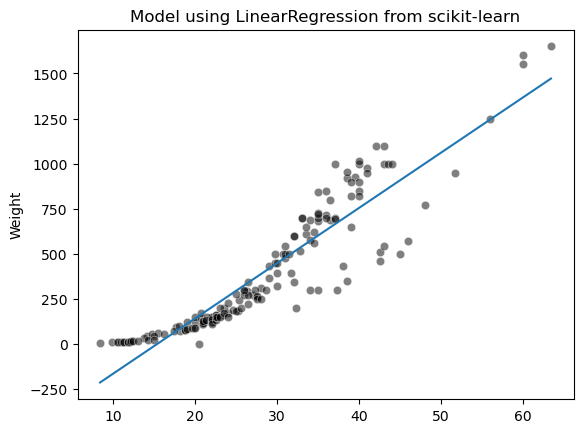

In [6]:
X, y = fish_market_df[["Length2"]], regression_target
model = LinearRegression()
model.fit(X=X, y=y)
score = model.score(X, y)
print("Model Score:", score)

y_pred = model.predict(X)
mse = mean_squared_error(y_true=y, y_pred=y_pred)
print("MSE:", mse)

intercept = model.intercept_
coef = model.coef_[0]
print("Intercept:", intercept)
print("Coef:", coef, model.coef_)

width_range = np.linspace(X.min(), X.max(), num=300)
predicted_weight = (coef * width_range + intercept)


sns.scatterplot(x=X.values.flatten(), y=y, color="black", alpha=0.5)
plt.plot(width_range, predicted_weight)
_ = plt.title("Model using LinearRegression from scikit-learn")

In [7]:
X, y = fish_market_df.values, regression_target

In [8]:
model = LinearRegression()
model.fit(X=X, y=y)
score = model.score(X, y)
print("Model Score:", score)

y_pred = model.predict(X)
mse = mean_squared_error(y_true=y, y_pred=y_pred)
print("MSE:", mse)

intercept_ = model.intercept_
coef = model.coef_
print("Intercept:", intercept_)
print("Coef:", coef)

Model Score: 0.8852867046546207
MSE: 14607.87894454194
Intercept: -499.58695535694164
Coef: [ 62.35521443  -6.52675249 -29.02621861  28.29735132  22.47330665]


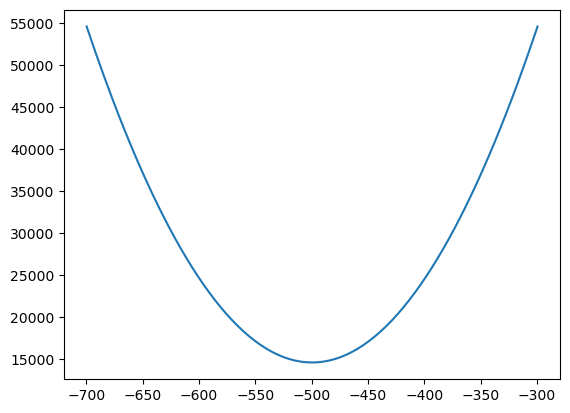

In [9]:
delta = 200
intercepts = np.linspace(intercept_ - delta, intercept_+ delta, 159)
mses = []
for intercept in intercepts:
  model.intercept_ = intercept
  ypred = model.predict(X)
  mse = mean_squared_error(y, ypred)
  mses.append(mse)
plt.plot(intercepts, mses)
plt.show()